In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib import patheffects
from adjustText import adjust_text

In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
#温度影响
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
        'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
        'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
        'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline',
        'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine',
        'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane',
        'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate',
        'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene',
        'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

datajhsoa["SOA"] = 0
datajh["SOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.30um"))]:
    datajhsoa["SOA"] = datajhsoa["SOA"] + datajhsoa[i]
    datajh["SOA"] = datajh["SOA"] + datajh[i]
datajhsoa["CSOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.30um"))]:
    datajhsoa["CSOA"] = datajhsoa["CSOA"] + datajhsoa[i]
datacmsoa["SOA"] = 0
datacm["SOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.30um"))]:
    datacmsoa["SOA"] = datacmsoa["SOA"] + datacmsoa[i]
    datacm["SOA"] = datacm["SOA"] + datacm[i]
datacmsoa["CSOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.30um"))]:
    datacmsoa["CSOA"] = datacmsoa["CSOA"] + datacmsoa[i]
datajh['place'] = 'JH'
datacm['place'] = 'CM'
dataall = pd.concat([datajh, datacm], axis=0)
dataall.columns = ['Time', 'TVOCs', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
                   'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
                   'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
                   'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene',
                   'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane',
                   'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
                   '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol',
                   'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol',
                   'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane',
                   'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um',
                   '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
                   '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um',
                   '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
                   'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons',
                   'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
                   'Day', 'Datetime', 'seconds', 'SOA', 'place']


In [4]:
from scipy.optimize import curve_fit
from scipy.stats import zscore
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates
from scipy.stats import t


# 定义与均值的关系函数（二次函数）
def mean_relation(T, Q0, a, v0):
    return Q0 + (a * T ** 2) / 2 + T * v0


# 定义与方差的关系函数（三次函数）
def std_dev_relation(T, k, sigma0):
    return (k ** 2 * T ** 3) / 3 + k * T ** 2 * sigma0 + T * sigma0 ** 2


# 定义去除离群值的函数（使用 Z-score 方法）
def remove_outliers(data):
    z_scores = zscore(data)
    return data[(np.abs(z_scores) < 3)]  # 通常使用 3 作为 Z-score 的阈值


from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from shapely.ops import unary_union
from scipy.stats import norm


def compute_area(points):
    # 计算点的凸包区域
    hull = ConvexHull(points)
    polygon = Polygon(points[hull.vertices])
    return polygon.area


def monte_carlo_r_squared_area(T, mean_params, std_dev_params, real_data, num_simulations=1000):
    original_points = np.column_stack((T, real_data))
    original_area = compute_area(original_points)

    simulation_areas = []
    overlap_areas = []

    for _ in range(num_simulations):
        simulated_path = norm.rvs(
            loc=mean_relation(T, *mean_params),
            scale=np.sqrt(std_dev_relation(T, *std_dev_params)),
            size=len(T)
        )
        simulated_points = np.column_stack((T, simulated_path))
        sim_area = compute_area(simulated_points)
        simulation_areas.append(sim_area)

        original_polygon = Polygon(original_points[ConvexHull(original_points).vertices])
        simulated_polygon = Polygon(simulated_points[ConvexHull(simulated_points).vertices])
        intersection_area = original_polygon.intersection(simulated_polygon).area
        overlap_areas.append(intersection_area)

    mean_overlap_area = np.mean(overlap_areas)
    mean_simulation_area = np.mean(simulation_areas)

    # Calculate R² based on area overlap
    r_squared_area = mean_overlap_area / original_area
    return min(max(r_squared_area, 0), 1)  # Ensure R² is in [0, 1]


# 定义异常值清理函数
def clean_data(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df.reset_index(drop=True)


def hour_min_to_float(hour_min_str):
    hour, minute = map(int, hour_min_str.split(":"))
    return hour + minute / 60.0


import re


def scientific_notation_with_superscript(value, precision=3):
    # 如果值为零，直接返回零字符串格式
    if value == 0:
        return f"{value:.{precision}f}"

    # 格式化为科学记数法，并去掉指数部分的前导零
    formatted_value = f"{value:.{precision}e}"
    formatted_value = formatted_value.replace('e+', 'x10^').replace('e-', 'x10^-')
    formatted_value = re.sub(r'x10\^([-+]?)0*(\d+)', r'x10^\1\2', formatted_value)  # 保留负号

    # 将指数部分的数字替换为 Unicode 上标
    superscript_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    match = re.search(r'x10\^([-+]?\d+)', formatted_value)
    if match:
        exponent = match.group(1).translate(superscript_map)
        formatted_value = re.sub(r'x10\^[-+]?\d+', f'x10{exponent}', formatted_value)
        # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')
    else:
        # 如果没有 x10^，直接返回数值部分
        formatted_value = formatted_value.split('x10')[0]
        # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')

    return formatted_value


from scipy.stats import norm, expon, gamma, lognorm, beta, kstest, shapiro


def normal_distribution_fit_and_test(grouped_by_hour):
    normality_results = {}
    for hour, group in grouped_by_hour:
        # Fit normal distribution and get parameters
        params = norm.fit(group)
        # Perform Shapiro-Wilk test
        _, p_value = shapiro(group)
        # Check if data is normally distributed based on p-value
        is_normal = True if p_value > 0.05 else False
        normality_results[hour] = (
            params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

    normality_df = pd.DataFrame(normality_results).T
    normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
    normality_df.reset_index(inplace=True)
    normality_df.rename(columns={'index': 'Hour'}, inplace=True)

    return normality_df


# 从 dataall 中筛选出 JH 和 CM 地点的数据
data_jh = dataall[dataall['place'] == 'JH'].copy()
data_cm = dataall[dataall['place'] == 'CM'].copy()
data = dataall.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()

In [5]:
# 从 dataall 中筛选出 JH 和 CM 地点的数据
data_jh = dataall[dataall['place'] == 'JH'].copy()
data_cm = dataall[dataall['place'] == 'CM'].copy()
data=dataall.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()

In [6]:

def create_models_for_location(data_location):
    # 计算每小时的均值
    datare = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare["O3"],
        "NOx": datare["NOx"],
        "SO2": datare["SO2"],
        "SOA": datare["SOA"],
        "K": 1,
        'Isoprene': datare["Isoprene"]
    })

    # 计算交互变量
    dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
    dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
    dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
    dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
    dataj["O3hv"] = dataj["O3"] * dataj["hv"]

    variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]

    # 模型 1：直接使用观测到的 Isoprene 浓度
    dataj["BVOCs"] = datare["Isoprene"]
    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene"]
    

    # 模型 2：使用温度拟合 Isoprene 的均值和方差，再以方差为权重拟合 SOA
    data_grouped = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    data_grouped["Concentration"] = data_grouped["Isoprene"]
    grouped_by_hour = data_grouped.groupby('Hour')
    normality_df = normal_distribution_fit_and_test(grouped_by_hour["Isoprene"])
    normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]

    # 提取数据
    T = normality_df['T'].values
    mean_values = normality_df['Mean'].astype("float").values
    std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2

    # 去除离群值
    mean_values_filtered = remove_outliers(mean_values)
    std_dev_values_filtered = remove_outliers(std_dev_values)
    T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
    T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]

    # 拟合模型
    params_mean, _ = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf', maxfev=10000)
    params_std_dev, _ = curve_fit(std_dev_relation, T_filtered_std_dev, std_dev_values_filtered, method='trf')

    # 计算 fitted Isoprene 和权重
    mean_isoprene = mean_relation(dataj["T"], *params_mean)
    std_dev_isoprene = std_dev_relation(dataj["T"], *params_std_dev)
    dataj["Isoprene_fitted"] = mean_isoprene
    weights = 1 / std_dev_isoprene  # 使用方差的倒数作为权重

    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene_fitted"]

    X2 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    X2=X2[['HNO3_BVOCs', 'HNO3O3_BVOCs', 'hv_BVOCs']]
    Y2 = dataj["SOA"]
    model2 = sm.WLS(Y2, X2, weights=weights).fit(cov_type='HC3')


    # 输出模型
    return model2,params_mean,params_std_dev


In [7]:
# # 构建 JH 和 CM 地点的模型
# modeljh,params_meanjh,params_std_devjh= create_models_for_location(data_jh)
# modelcm,params_meancm,params_std_devcm=create_models_for_location(data_cm)

In [8]:
modelall,params_mean,params_std_dev=create_models_for_location(dataall)

C:\Users\aa271\AppData\Local\Temp\ipykernel_3756\1162883040.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


In [9]:
data_location = dataall.copy()
params_mean = params_mean
params_std_dev = params_std_dev
model = modelall

# 计算每小时的均值
datare = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
dataj = pd.DataFrame({
    "Time": datare["Hour_Min"],
    "T": datare["Temperature"],
    "hv": datare["Radiation"],
    "RH": datare["Humidity"],
    "O3": datare["O3"],
    "NOx": datare["NOx"],
    "SO2": datare["SO2"],
    "SOA": datare["SOA"],
    "K": 1,
    'Isoprene': datare["Isoprene"]
})

# 计算交互变量
dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
dataj["O3hv"] = dataj["O3"] * dataj["hv"]

variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]

dataj["Isoprene_fitted"] = mean_relation(dataj["T"], *params_mean)
for var in variables_to_regress:
    dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene_fitted"]

X = dataj[[var + "_BVOCs" for var in variables_to_regress]]
X=X[['HNO3_BVOCs', 'HNO3O3_BVOCs', 'hv_BVOCs']]
Y = model.predict(X)

In [10]:
X_vif = X.copy()
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


# Iteratively remove variables with high VIF (threshold: 5)
vif_threshold = 5
high_vif_columns = True

while high_vif_columns:
    vif_result = calculate_vif(X_vif)
    max_vif = vif_result["VIF"].max()
    if max_vif > vif_threshold:
        high_vif_var = vif_result.loc[vif_result["VIF"].idxmax(), "Variable"]
        X_vif = X_vif.drop(columns=[high_vif_var])
    else:
        high_vif_columns = False

# Output the remaining variables
remaining_variables = X_vif.columns.tolist()
remaining_variables

['HNO3_BVOCs', 'HNO3O3_BVOCs', 'hv_BVOCs']

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                    SOA   R-squared (uncentered):                   0.962
Model:                            WLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          1.773e+04
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:13:41   Log-Likelihood:                         -1148.2
No. Observations:                1440   AIC:                                      2302.
Df Residuals:                    1437   BIC:                                      2318.
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
HNO3_BVOCs       0.0023   3.47e-05     66.530      0.000       0.002       0.002
HNO3O3_BVOCs  4.428e-05    1.7e-06     26.077      0.000    4.09e-05    4.76e-05
hv_BVOCs         0.0006      0.000      1.423      0.155      -0.000       0.001
==============================================================================
Omnibus:                      260.353   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.239
Skew:                          -1.044   Prob(JB):                    2.96e-118
Kurtosis:                       5.159   Cond. No.                         616.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
"""

In [12]:
# 提取 O3, NOx, SO2 的均值和标准差
pollutants_stats = dataj[['O3', 'NOx']].agg(['mean', 'std']).T
pollutants_stats.columns = ['mean', 'std']

In [13]:
pollutants_stats 

,mean,std
O3,18.127806,13.002142
NOx,7.906997,2.200707


In [14]:
def simulate_pollutant_scenarios(dataj, pollutants_stats, model, num_simulations=10):
    results = []  # 存储所有情景结果
    pollutants = ['O3', 'NOx']  # 污染物列表

    for row_pollutant in pollutants:  # 遍历行污染物
        for col_pollutant in pollutants:  # 遍历列污染物
            # 创建数据副本
            scenario_data = dataj.copy()

            # 对角线情景：单一污染物增加一个标准差
            if row_pollutant == col_pollutant:
                scenario_data[row_pollutant] += 1*pollutants_stats.loc[row_pollutant, 'std']
            
            # 非对角线情景：两个污染物同时增加一个标准差
            else:
                scenario_data[row_pollutant] += 1*pollutants_stats.loc[row_pollutant, 'std']
                scenario_data[col_pollutant] += 1*pollutants_stats.loc[col_pollutant, 'std']
                
            # 计算交互变量
            scenario_data["HNO3"] = scenario_data["RH"] * scenario_data["NOx"]
            scenario_data["H2SO4"] = scenario_data["RH"] * scenario_data["SO2"]
            scenario_data["H2SO403"] = scenario_data["RH"] * scenario_data["SO2"] * scenario_data["O3"]
            scenario_data["HNO3O3"] = scenario_data["RH"] * scenario_data["NOx"] * scenario_data["O3"]
            scenario_data["O3hv"] = scenario_data["O3"] * scenario_data["hv"]
            
            variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]

            # 模拟多个随机结果
            for _ in range(num_simulations):
                
                mean_isoprene = mean_relation(scenario_data["T"], *params_mean)
                std_dev_isoprene = std_dev_relation(scenario_data["T"] , *params_std_dev)
                random_BVOCs = np.random.normal(loc=mean_isoprene, scale=std_dev_isoprene, size=dataj.shape[0])
                scenario_data["Isoprene_fitted"] = random_BVOCs
                
    
                for var in variables_to_regress:
                    scenario_data[var + "_BVOCs"] = scenario_data[var] * scenario_data["Isoprene_fitted"]

                # 模型预测 SOA
                X = scenario_data[[var + "_BVOCs" for var in variables_to_regress]]
                X=X[['HNO3_BVOCs', 'HNO3O3_BVOCs', 'hv_BVOCs']]
                Y = model.predict(X)

                # 保存结果
                temp_data = pd.DataFrame({
                    "Time": scenario_data["Time"],
                    row_pollutant:scenario_data[row_pollutant],
                    col_pollutant:scenario_data[col_pollutant],
                    "Pollutant_1": row_pollutant,
                    "Pollutant_2": col_pollutant,
                    "SOA": Y
                })
                results.append(temp_data)

    return results


In [15]:
results = simulate_pollutant_scenarios(dataj, pollutants_stats, model, num_simulations=50)

In [16]:
# 定义污染物和标准差
pollutants = ['O3', 'NOx']
pollutants_titles = {'O3': 'O₃ Increased', 'NOx': 'NOₓ Increased'}

D:\miniconda3\envs\venconda\lib\site-packages\adjustText\__init__.py:419: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.draw_without_rendering()


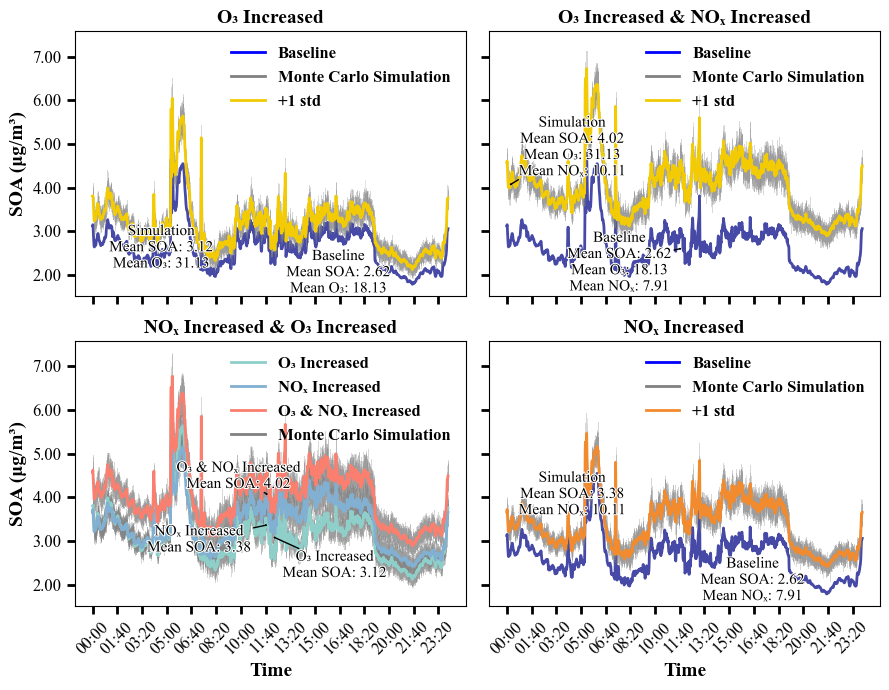

In [17]:
# 定义污染物和标题
pollutants = ['O3', 'NOx']
pollutants_titles = {'O3': 'O₃ Increased', 'NOx': 'NOₓ Increased'}
pollutantsreal = {'O3': 'O₃', 'NOx': 'NOₓ'}


# 创建 3×3 子图
fig, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True, sharey=True)
colors = ['#F2CB05','#F28A2E']  # 自定义颜色用于区分情景


for i, row_pollutant in enumerate(pollutants):
    for j, col_pollutant in enumerate(pollutants):
        
        if i!=1 or j!=0:
            
            ax = axes[i, j]
    
            # 筛选对应情景数据
            scenario_data = [
                r for r in results
                if r["Pollutant_1"].iloc[0] == row_pollutant and r["Pollutant_2"].iloc[0] == col_pollutant
            ]
            combined_data = pd.concat(scenario_data)
    
            # 绘制 Baseline 数据
            sns.lineplot(x=dataj["Time"], y=Y, ax=ax, color='#464AA6', linewidth=2, label="Baseline")
    
            # 绘制所有蒙特卡洛模拟结果（灰色）
            for _, simulation in combined_data.groupby("Time"):
                ax.plot(simulation["Time"], simulation["SOA"], color='grey', alpha=0.3, linewidth=0.5)
    
            # 绘制蒙特卡洛模拟均值（+1 std 情景）
            mean_data = combined_data.groupby("Time")["SOA"].mean().reset_index()
            sns.lineplot(data=mean_data, x="Time", y="SOA", ax=ax, color=colors[i], linewidth=2, label="+1 std")
    
            # 设置标题
            if i == j:
                title = f"{pollutants_titles[row_pollutant]}"
            else:
                title = f"{pollutants_titles[row_pollutant]} & {pollutants_titles[col_pollutant]}"
            ax.set_title(title, fontsize=14, weight='bold')
    
            # 设置x轴、y轴标签
            ax.set_xlabel("Time", fontsize=14, weight='bold')
            ax.set_ylabel("SOA (μg/m³)", fontsize=14, weight='bold')
    
            # 设置x轴刻度间隔
            ax.set_xticks(dataj["Time"][::100])
            ax.tick_params(axis='both', labelsize=12, width=2, length=6)
            ax.tick_params(axis='x', rotation=45)
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Y轴格式化显示两位小数
    
            # 自定义图例
            legend_elements = [
                Line2D([0], [0], color='blue', linewidth=2, label="Baseline"),
                Line2D([0], [0], color='grey', linewidth=2, label="Monte Carlo Simulation"),
                Line2D([0], [0], color=colors[i], linewidth=2, label="+1 std")
            ]
            ax.legend(handles=legend_elements, loc='upper right',  frameon=False, prop={'size': 12, 'weight': 'bold'})
            
            # 计算中心值并添加注释
            
            texts = [] 
    
            # 计算 Baseline 中心值
            baseline_mean_soa = Y.mean()
            baseline_mean_pollutants = {pollutant: dataj[pollutant].mean() for pollutant in pollutants}
    
            baseline_annotation = (
                f"Baseline\nMean SOA: {baseline_mean_soa:.2f}\n"
                f"Mean {pollutantsreal[row_pollutant]}: {baseline_mean_pollutants[row_pollutant]:.2f}"
            )
    
            if i != j:  # 添加第二种污染物均值
                baseline_annotation += f"\nMean {pollutantsreal[col_pollutant]}: {baseline_mean_pollutants[col_pollutant]:.2f}"
    
            # 添加 Baseline 注释
            baseline_text = ax.text(
                dataj["Time"].iloc[len(dataj) // 2],
                baseline_mean_soa,
                baseline_annotation,
                fontsize=11, ha='center', va='center', color='black', zorder=15
            )
            texts.append(baseline_text)
            
             # 添加蒙特卡洛情景注释
            center_time = combined_data["Time"].iloc[combined_data.shape[0] // 2]
            mean_soa = combined_data["SOA"].mean()
            mean_row = combined_data[row_pollutant].mean()
            mean_col = combined_data[col_pollutant].mean()
    
            if i == j:
                annotation = f"Simulation\nMean SOA: {mean_soa:.2f}\nMean {pollutantsreal[row_pollutant]}: {mean_row:.2f}"
            else:
                annotation = (
                    f"Simulation\nMean SOA: {mean_soa:.2f}\n"
                    f"Mean {pollutantsreal[row_pollutant]}: {mean_row:.2f}\nMean {pollutantsreal[col_pollutant]}: {mean_col:.2f}"
                )
    
            # 添加注释
            scenario_text = ax.text(
                center_time, mean_soa,
                annotation,
                fontsize=11, ha='center', va='center', color='black', zorder=15
            )
            texts.append(scenario_text)
    
            # 添加描边效果
            for text in texts:
                text.set_path_effects([
                    patheffects.Stroke(linewidth=1.5, foreground="white"),
                    patheffects.Normal()
                ])
            
            # 调整注释避免重叠
            adjust_text(
                texts,
                arrowprops=dict(arrowstyle="-|>", color='black', zorder=10)  ,ax=ax
            )
            
        else:
             
            ax = axes[i, j]
            
            
            # 情景：单独提高 O₃
            o3_data = [
                r for r in results
                if r["Pollutant_1"].iloc[0] == "O3" and r["Pollutant_2"].iloc[0] == "O3"
            ]
            o3_combined = pd.concat(o3_data)

            # 情景：单独提高 NOₓ
            nox_data = [
                r for r in results
                if r["Pollutant_1"].iloc[0] == "NOx" and r["Pollutant_2"].iloc[0] == "NOx"
            ]
            nox_combined = pd.concat(nox_data)

            # 情景：同时提高 O₃ 和 NOₓ
            scenario_data = [
                r for r in results
                if r["Pollutant_1"].iloc[0] == row_pollutant and r["Pollutant_2"].iloc[0] == col_pollutant
            ]
            combined_data = pd.concat(scenario_data)
    
            both_combined = combined_data
            
             # 绘制三种情景的蒙特卡洛模拟结果
            for _, simulation in o3_combined.groupby("Time"):
                ax.plot(simulation["Time"], simulation["SOA"], color='grey', alpha=0.3, linewidth=0.5)
            for _, simulation in nox_combined.groupby("Time"):
                ax.plot(simulation["Time"], simulation["SOA"], color='grey', alpha=0.3, linewidth=0.5)
            for _, simulation in both_combined.groupby("Time"):
                ax.plot(simulation["Time"], simulation["SOA"], color='grey', alpha=0.3, linewidth=0.5)
            
             # 计算并绘制均值曲线
            o3_mean = o3_combined.groupby("Time")["SOA"].mean().reset_index()
            nox_mean = nox_combined.groupby("Time")["SOA"].mean().reset_index()
            both_mean = both_combined.groupby("Time")["SOA"].mean().reset_index()
            
            sns.lineplot(data=o3_mean, x="Time", y="SOA", ax=ax, color='#8ECFC9', linewidth=2, label="O₃ Increased")
            sns.lineplot(data=nox_mean, x="Time", y="SOA", ax=ax, color='#82B0D2', linewidth=2, label="NOₓ Increased")
            sns.lineplot(data=both_mean, x="Time", y="SOA", ax=ax, color='#FA7F6F', linewidth=2, label="O₃ & NOₓ Increased")
            
            texts = [] 
            
            # 标注三种情景的中心点
            for data, label, color in zip([o3_mean, nox_mean, both_mean], ["O₃ Increased", "NOₓ Increased", "O₃ & NOₓ Increased"], ['#8ECFC9','#82B0D2','#FA7F6F']):
                center_time = data["Time"].iloc[len(data) // 2]
                center_soa = data["SOA"].mean()
                text = ax.text(
                    center_time, center_soa,
                    f"{label}\nMean SOA: {center_soa:.2f}",
                    fontsize=11, ha='center', va='center', color='black', zorder=15
                )
                texts.append(text)
            # 添加描边效果
            for text in texts:
                text.set_path_effects([
                    patheffects.Stroke(linewidth=1.5, foreground="white"),
                    patheffects.Normal()
                ])
            
            # 调整注释避免重叠
            adjust_text(
                texts,
                arrowprops=dict(arrowstyle="-|>", color='black', zorder=10)  ,ax=ax
            )
            
            # 设置标题
            if i == j:
                title = f"{pollutants_titles[row_pollutant]}"
            else:
                title = f"{pollutants_titles[row_pollutant]} & {pollutants_titles[col_pollutant]}"
            ax.set_title(title, fontsize=14, weight='bold')
    
            # 设置x轴、y轴标签
            ax.set_xlabel("Time", fontsize=14, weight='bold')
            ax.set_ylabel("SOA (μg/m³)", fontsize=14, weight='bold')
    
            # 设置x轴刻度间隔
            ax.set_xticks(dataj["Time"][::100])
            ax.tick_params(axis='both', labelsize=12, width=2, length=6)
            ax.tick_params(axis='x', rotation=45)
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Y轴格式化显示两位小数
            
            
            # 自定义图例
            legend_elements = [
                Line2D([0], [0], color='#8ECFC9', linewidth=2, label="O₃ Increased"),
                Line2D([0], [0], color='#82B0D2', linewidth=2, label="NOₓ Increased"),
                Line2D([0], [0], color='#FA7F6F', linewidth=2, label="O₃ & NOₓ Increased"),
                Line2D([0], [0], color='grey', linewidth=2, label="Monte Carlo Simulation"),
            ]
            ax.legend(handles=legend_elements, loc='upper right',  frameon=False, prop={'size': 12, 'weight': 'bold'})
            
   
            

# 调整布局
plt.tight_layout()
plt.savefig('随机过程模拟分析-人为污染物.svg',  bbox_inches='tight')
plt.show()